In [1]:
import cv2 # pip install opencv-python

In [2]:
import matplotlib.pyplot as plt # pip install matplotlib

In [3]:
config_file = 'ssd_mobilenet_v3_large_coco_2020_01_14.pbtxt'
frozen_model = 'frozen_inference_graph.pb'

In [4]:
model = cv2.dnn_DetectionModel(frozen_model,config_file)

In [5]:
classLabels = [] ## empty list of python
file_name = 'Labels.txt'
with open(file_name,'rt') as fpt: 
    classLabels = fpt.read().rstrip('\n').split('\n')

In [6]:
print(classLabels)

['person', 'bicycle', 'car', 'motorbike', 'aeroplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'sofa', 'pottedplant', 'bed', 'diningtable', 'toilet', 'tvmonitor', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']


In [7]:
print(len(classLabels))

80


In [8]:
model.setInputSize(320,320)
model.setInputScale(1.0/127.5)  ## 255/2 = 127.5
model.setInputMean((127.5,127.5,127.5)) ## mobilenet => [-1,1]
model.setInputSwapRB(True)

< cv2.dnn.Model 00000277F30D2150>

 read an image

In [9]:
img = cv2.imread('man-car.jpg')

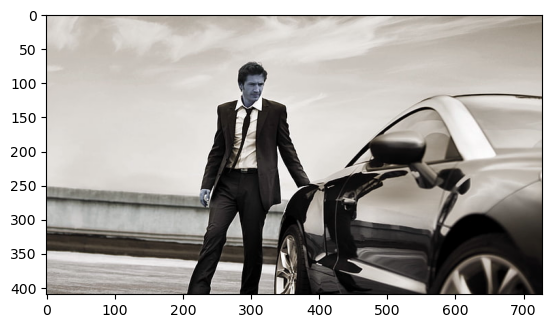

In [10]:
plt.imshow(img) ## bgr

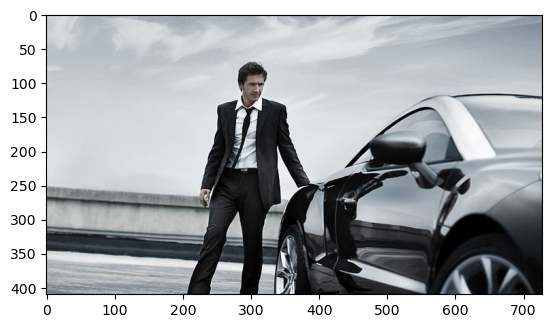

In [11]:
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

In [12]:
ClassIndex, confidece, bbox = model.detect(img,confThreshold = 0.5)

In [13]:
print(ClassIndex)

[3 1]


In [14]:
font_scale = 3
font = cv2.FONT_HERSHEY_PLAIN
for ClassInd, conf, boxes in zip(ClassIndex.flatten(), confidece.flatten(), bbox):
    #cv2.rectangle(frame, (x,y) , (x+w,y+h), (255,0,0), 2)
    #cv2.putText(img, text, (text_offset_x, text_offset_y), font, fontScale = font_scale, color=(0,0,0), thickness=1)
    cv2.rectangle(img,boxes,(255,0,0), 2)
    cv2.putText(img,classLabels[ClassInd-1],(boxes[0]+10,boxes[1]+40), font, fontScale = font_scale,color=(0,255,0), thickness = 3)

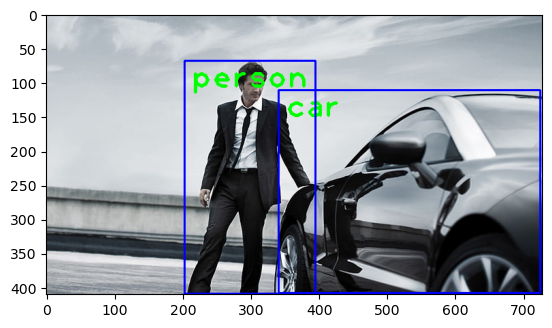

In [15]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

## VIDEO DEMO 

In [ ]:
cap = cv2.VideoCapture(1)

# check if the video is opened corrently
if not cap.isOpened():
    cap=cv2.VideoCapture(0)
if not cap.isOpened():
    raise IOError("Correct open video")
    
font_scale = 3 
font = cv2.FONT_HERSHEY_PLAIN

while True:
    ret,frame = cap.read()
    
    ClassIndex, confidece, bbox = model.detect(frame,confThreshold = 0.55)
    
    print(ClassIndex)
    if (len(ClassIndex)!=0):
        for ClassInd, conf, boxes in zip(ClassIndex.flatten(), confidece.flatten(), bbox):
            if(ClassInd<=80):
                cv2.rectangle(frame,boxes,(255,0,0), 2)
                cv2.putText(frame,classLabels[ClassInd-1],(boxes[0]+10,boxes[1]+40), font, fontScale = font_scale,color=(0,255,0), thickness = 3)
                
    cv2.imshow('Object Detection Tutorial',frame)
    
    if cv2.waitKey(2) & 0xFF == ord('q'):
        break;
        
cap.release()
cv2.destroyAllWindows()

()
()
()
()
()
()
()
()
()
()
()
()
()
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
()
()
[73]
[62  1]
[62 72]
[62  1]
[ 1 62]
[ 1 62 62]
[62]
[73  1]
[73]
[62]
[62 62  1]
[62  1]
[72]
[62]
()
[62]
()
()
[72]
[62 62]
[62]
()
()
()
()
()
()
[73]
()
()
[73]
()
[1]
[62]
[1]
()
[1]
()
[72]
()
()
()
[72]
()
()
()
()
()
()
()
[ 1 73 73]
[32  1 73]
[32  1]
[32  1]
[ 1 32]
[ 1 32]
[1]
[1]
[1]
[1]
[ 1 32 62 73]
[ 1 32 73]
[ 1 32 73]
[ 1 32 73]
[ 1 32]
[ 1 32]
[1]
[ 1 32 73]
[72 73 73  1]
[ 1 73 72]
[ 1 73]
[73  1 72 73 72]
[ 1 73  1 73]
[73  1  1 73]
[ 1 73]
[73  1 73  1]
[ 1 73 32]
[ 1 32]
[ 1 32]
[ 1 73]
[1]
[ 1 73]
[1]
[ 1 73]
[ 1 73]
[ 1 73 72]
[ 1 73 73]
[ 1 73]
[1]
[1]
[1 1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[ 1 73]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[ 1 73]
[ 1 73 72]
[ 1 73]
[ 1 73 72]
[ 1 73]
[73  1]
[ 1 73 72 73]
[ 1 73 72 73]
[ 1 72]
[ 1 32 72]
[ 1 32]
[1]
[1]
[1]
[32  1]
[32  1]
[32 32  1]
[32]
[32 32  1]
[32 32  1]
[

[1]
[1]
[73  1]
[ 1 72]
()
[73]
[72]
()
[73 62]
()
[62]
()
[ 1 73]
[1]
[72]
[1]
()
[73  1]
[ 1 72]
()
[ 1 72]
[1]
[1]
[72]
[1]
[ 1 72]
[ 1 73]
[1]
[1]
()
[1]
[72  1]
[1]
[1]
[1]
()
()
[72]
[72]
[72]
()
[73 62]
()
[72]
()
[72]
()
()
[72]
()
()
()
()
()
[73 72]
[72]
[72]
()
()
[73]
()
()
()
()
[72]
()
()
()
[ 1 73]
[72]
[73]
()
()
[73]
()
[ 1 72]
[1]
[72]
[1]
[1]
()
[1]
()
[ 1 62]
[ 1 72 62]
()
[1]
()
[1]
()
()
[1]
[73]
[ 1 72]
[ 1 72]
[1]
[1]
[1]
[ 1 73 72]
[ 1 73]
[1]
()
[1]
[ 1 72]
[73]
()
[1]
[ 1 72]
[1]
[72  1]
()
()
()
[ 1 72 62]
[72]
()
[72  1]
()
()
[ 1 62]
()
[72  1]
[ 1 72 73]
[ 1 72]
[72]
[ 1 72]
[72  1]
()
[72]
[72]
[1]
[72]
[ 1 72 62]
[ 1 72]
[72]
[ 1 73]
[73]
()
[72]
[72  1]
()
[72]
()
()
[1]
[72]
[ 1 72]
[72]
[1]
[72  1]
()
()
()
[1]
()
[1]
[1]
[72]
[1]
[1]
[73 72]
()
()
()
[72]
()
[ 1 72]
[72]
[72  1]
[72]
[1]
[ 1 73]
[ 1 72]
[ 1 72]
[73 72]
[73 72]
[72]
()
[ 1 72]
[ 1 73]
[73]
[73  1]
[73]
[1]
[72]
[73]
[1]
[ 1 72]
[72]
()
[72]
[1]
[ 1 72]
()
[ 1 62]
[1 1]
[ 1 72  1]
()


()
[62]
()
[62]
[72 62]
[62]
[62]
[62 72]
()
[72 62]
[62 72]
()
[62]
()
()
[62]
[72]
[72]
()
[62]
()
[62]
()
[72]
()
[62]
[62 72]
()
[62]
[62 72]
[62]
[62]
()
[62 72]
[62]
()
[62 72]
[62 72]
[62]
()
[62]
[62]
()
[62  1]
()
[1]
[62]
[62]
[ 1 62]
[ 1 62 72]
[62]
[62  1]
()
[ 1 72 62]
[62]
[ 1 62]
[62]
[72 62]
[1]
[1]
[72  1 62]
[72  1]
[1]
[ 1 72]
()
()
[ 1 72  1 73]
[ 1 72]
[72]
[ 1 72]
[ 1 72]
[62]
[ 1 72]
[ 1 72]
[72]
[1]
[72  1]
()
[72]
[72  1]
[72]
[72]
[72]
()
[72]
[72]
[ 1 72]
()
[1]
[72]
[72]
()
[72]
()
()
[72]
[72]
()
[72]
[72]
[72  1]
()
[1]
[1]
[1]
[1]
[62 72]
()
[1]
[ 1 73]
[1]
[62  1]
[1]
[ 1 73]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[ 1 73]
[1]
[1]
[1]
[1]
[ 1 73]
[1]
[1]
[1]
[1]
[ 1 72]
[ 1 72]
[1]
()
()
[72]
()
()
()
()
()
()
()
()
()
()
[72]
[1]
[1]
[62  1  1]
[1]
[ 1 73]
[1]
[1]
[1]
[ 1 72]
[72]
()
[73  1  1]
[1 1]
()
[1]
[72]
[1]
[1 1]
[ 1 73]
[1]
[72]
[73 73  1]
[ 1  1 72]
[72]
[1 1]
[1 1]
[1]
[1]
()
[73  1]
[72  1]
()
[1]
[ 1 62  1]
[1 1]
[72]
[62  1]
[ 1 72 62]
()
()
()
[

[1]
[ 1 62]
[1]
[1]
[1]
[ 1 62]
[1]
[1]
[1]
[1]
[ 1 73]
[1]
[1]
[1]
[1]
[1]
[1]
[ 1 62]
[1]
[1]
[1]
[1]
[1]
[1]
[ 1 62]
[1]
[1]
[ 1 62]
[1]
[1]
[1]
[1]
[ 1 73]
[1]
[1]
[1]
[1]
[ 1 62 73]
[ 1 62]
[ 1 73]
[1]
[1]
[ 1 62]
[ 1 62]
[1]
[1]
[1]
[ 1 62]
[1]
[1]
[1]
[1]
[ 1 73]
[1]
[1]
[1]
[ 1 73]
[ 1 73 73]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[ 1 72]
[1]
[1]
[1]
[1]
[ 1 73]
[1]
[1]
[1]
[1]
[ 1 73]
[1]
[1]
[1]
[1]
[ 1 72]
[1]
[ 1 62]
[1]
[1]
[1]
[ 1 73]
[1]
[1]
[62  1]
[1]
[1]
[1]
[ 1 73]
[ 1 73]
[1]
[ 1 62]
[1]
[1]
[1]
[ 1 72]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[ 1 62]
[1]
[1]
[ 1 73]
[1]
[1]
[ 1 72]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[ 1 72]
[1]
[1]
[1]
[1]
[1]
[ 1 73]
[ 1 72 62]
[1]
[1]
[1]
[ 1 62]
[ 1 73 73]
[1]
[1]
[ 1 62]
[ 1 72]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[ 1 62]
[1]
[1]
[ 1 73]
[ 1 62]
[1]
[1]
[ 1 73]
[1]
[1]
[ 1 62]
[1]
[ 1 73]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[ 1 62 72]
[ 1 62]
[1]
[1]
[1]
[ 1 73]
[1]
[1]
[ 1 73]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[ 1 73]
[1]
[1]
[ 1 62]
[ 1 7

[ 1 32]
[ 1 32 73 73]
[ 1 32 73]
[73  1 32]
[ 1 32]
[1]
[ 1 32 73 73]
[73  1 73]
[1]
[ 1 73 32]
[1]
[1]
[1]
[1]
[1]
()
[1]
()
()
()
()
()
()
[62]
()
()
[72]
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
[62]
()
()
()
()
[72]
()
()
()
()
()
()
()
()
[1]
()
[1]
[ 1 32]
[ 1 32]
[1]
[ 1 32]
[ 1 32]
[32  1]
[ 1 32 73]
[32  1 73]
[32  1 73]
[32  1 62 62 73]
[ 1 32]
[ 1 32 73 62]
[ 1 32 73]
[ 1 32 73 62]
[ 1 32 73]
[ 1 32]
[ 1 32]
[ 1 32 73]
[ 1 32]
[ 1 32]
[1]
[ 1 32]
[ 1 32]
[ 1 32 73]
[32  1 73]
[32  1]
[ 1 32]
[ 1 32]
[ 1 32]
[32  1 73]
[ 1 32 62 32]
[ 1 32 62 32]
[ 1 32 73]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[ 1 67]
[1]
[1]
[1]
[1]
[1]
[1]
[ 1 73]
[ 1 73]
[73  1]
[ 1 73]
[73 32  1]
[73 32  1]
[ 1 32 73  1]
[32  1 73]
[ 1 32 73]
[ 1 32 73]
[32  1 73 73]
[ 1 32 73 73 62]
[ 1 32 73 73 62]
[ 1 32 73]
[ 1 32]
[ 1 32  1]
[ 1 32  1]
[ 1 32 73]
[ 1 32]
[32  1 73]
[32  1 73]
[32  1]
[32  1]
[32  1]
[32  1]
[32  1]
[32  1 62]
[32  1 62]
[32  1 73 62]
[ 1 32 73]
[ 1 32]
[32  1]
[ 1 32]
[ 1 3